<Axes: >

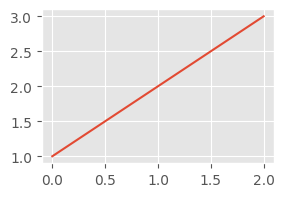

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
pd.Series([1, 2, 3]).plot(figsize=(3, 2))

# 데이터 불러오기

In [88]:
# df = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/main/advertising.csv')
df = pd.read_csv("../data/advertising.csv")

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# 다중회귀

## 변수 선택
* 3가지 독립변수 모두 선택

In [89]:
# -----------------------------------
# 독립변수, 종속변수 선택
# -----------------------------------
X = df.drop(["Sales"], axis=1)
y = df["Sales"]

print(X)
print(y)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]
0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


<Axes: >

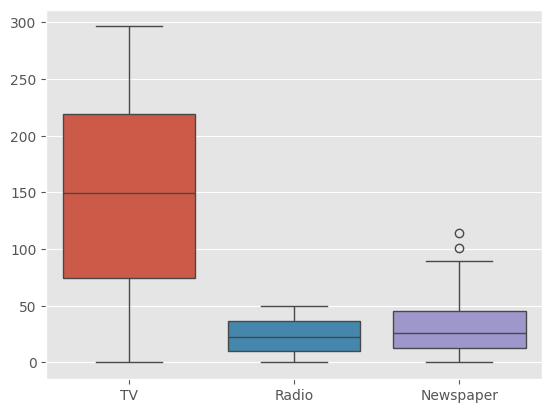

In [90]:
# -----------------------------------
# 독립변수, 종속변수 데이터 범위 파악
# -----------------------------------
sns.boxplot(data=X)

## 훈련세트 테스트세트 분할

In [91]:
# ------------------------------------------
# 훈련세트, 테스트세트 분할
# ------------------------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## 스케일링

In [92]:
# ------------------------------------------
# 독립변수 스케일링
# ------------------------------------------
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 훈련 세트로 fit (표준화를 하기 위한 규칙 생성) -> transform (규칙에 따라 데이터 변환)
# scaler.fit(X_train)
# scaler.transform(X_train)
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 세트로 transform (훈련 세트로 훈련한 규칙에 따라 데이터 변환)
X_test_scaled = scaler.transform(X_test)

In [93]:
X_train_scaled

array([[-0.8814297 ,  1.56851374,  0.19562328],
       [ 0.18206797, -1.10371242, -0.8546056 ],
       [-1.70086527,  1.70986576,  2.15572787],
       [-1.71147667,  1.03676093,  0.97482535],
       [-0.9026525 , -1.52776846, -0.75781031],
       [-0.27775918, -1.1979471 ,  0.04075082],
       [-0.93802382, -0.43733864, -0.84976584],
       [ 1.61224833,  1.26561657,  1.00386394],
       [-1.57234948, -0.22867615, -0.6513355 ],
       [ 0.52634882, -1.34603016, -1.18854935],
       [ 1.54857995, -0.86812573, -1.16435052],
       [ 0.37661023, -0.16809671, -0.40934727],
       [-0.47230144, -0.41041445,  0.39405362],
       [-1.52282963,  0.78098109,  1.7153093 ],
       [ 1.62403877, -1.30564387, -1.06271547],
       [-1.57470757, -0.50464913, -0.39482798],
       [ 1.65823104,  0.28288352, -1.38697969],
       [-1.58296088, -0.76716001, -0.34159057],
       [-0.21998603, -1.25179548, -1.02399735],
       [-1.50160684,  1.04349198, -1.02399735],
       [-0.61968194, -0.93543621, -1.299

In [94]:
X_train_scaled[:, 0].mean()

np.float64(-3.019806626980426e-16)

In [95]:
print(f"각 변수의 평균: {X_train_scaled.mean(axis=0)}")
print(f"각 변수의 표준편차: {X_train_scaled.std(axis=0)}")

각 변수의 평균: [-3.01980663e-16 -2.36847579e-17  4.26325641e-16]
각 변수의 표준편차: [1. 1. 1.]


<Axes: >

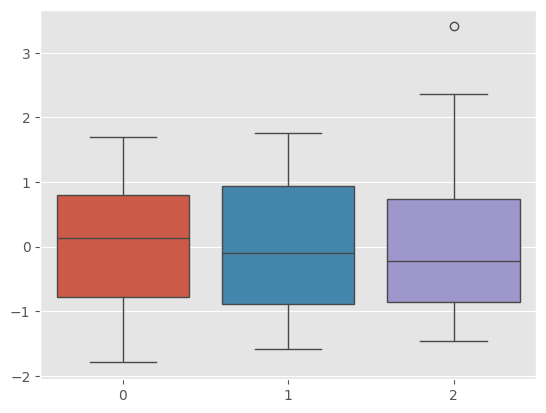

In [96]:
sns.boxplot(data=X_train_scaled)

## 모델 생성 및 훈련

In [97]:
# ------------------------------------------
# LinearRegression 클래스 import
# ------------------------------------------
from sklearn.linear_model import LinearRegression

# ------------------------------------------
# 모델객체 생성하기
# ------------------------------------------
model = LinearRegression()

# ------------------------------------------
# 훈련데이터로 모델 훈련하기
# ------------------------------------------
model.fit(X_train_scaled, y_train)

LinearRegression()

## 평가

In [98]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    root_mean_squared_error,
    r2_score,
)

# -----------------------------------
# 테스트데이터의 예측값
# -----------------------------------
pred = model.predict(X_test_scaled)

# -----------------------------------
# 모델 평가
# -----------------------------------
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("===다중회귀 모델의 평가결과===")
print(f"R2:{r2:.2f}")
print(f"RMSE:{rmse:.2f}")
print(f"MAE:{mae:.2f}")
print(f"MSE:{mse:.2f}")

===다중회귀 모델의 평가결과===
R2:0.91
RMSE:1.55
MAE:1.12
MSE:2.40


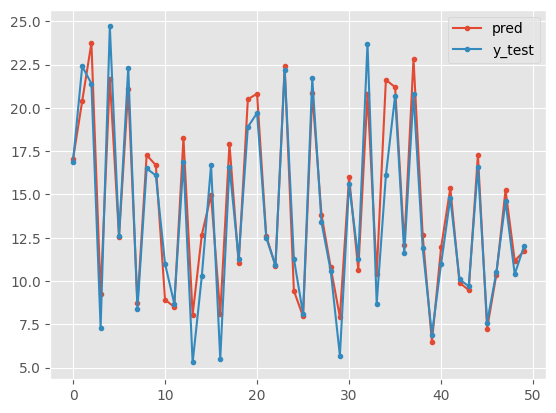

In [99]:
plt.plot(pred, marker=".", label="pred")
plt.plot(np.array(y_test), marker=".", label="y_test")
plt.legend()

## 모델의 학습 결과

In [100]:
w = model.coef_
b = model.intercept_

print(f"회귀계수: {model.coef_}")
print(f"절편: {model.intercept_}")
print(f"회귀식: {w[0]} * tv + {w[1]} * radio + {w[2]} * newspaper + {b}")

회귀계수: [4.63204383 1.48207916 0.0889496 ]
절편: 15.570666666666671
회귀식: 4.632043828977967 * tv + 1.4820791574834187 * radio + 0.0889495984853728 * newspaper + 15.570666666666671


<BarContainer object of 3 artists>

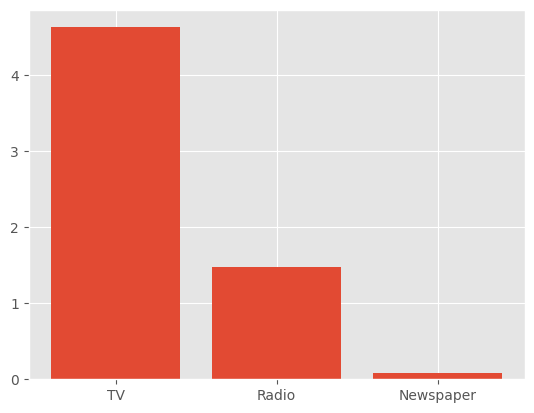

In [101]:
plt.bar(X.columns, model.coef_)

## 새로운 값 예측하기
* 스케일링 된 데이터로 훈련했으므로 예측할 데이터도 스케일링을 해주어야 한다.
* 훈련세트에서 사용한 스케일러를 이용하여 스케일링한다.
* 이 때는 fit 하지 않고 transform만 한다.

In [102]:
new_X = [[175, 15, 2]]

new_X_scaled = scaler.transform(new_X)
pred = model.predict(new_X_scaled)

print(pred)

[15.80426509]


/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 모델 저장 및 활용
* 스케일링을 하여 모델을 생성한 경우, 동일한 스케일링 방식을 저장하기 위해 스케일러도 저장해주어야 합니다.

#### 모델 및 스케일러 저장

In [103]:
import joblib

joblib.dump(model, "../models/ad_lr_model.pkl")
joblib.dump(scaler, "../models/ad_lr_scaler.pkl")

['../models/ad_lr_scaler.pkl']

#### 모델 불러와 사용하기

In [104]:
# ---------------------
# 모델 불러오기
# ---------------------
model = joblib.load("../models/ad_lr_model.pkl")

# ---------------------
# 스케일러 불러오기
# ---------------------
scaler = joblib.load("../models/ad_lr_scaler.pkl")

# ------------------------------------
# 예측
# ------------------------------------
new_X = [[175, 15, 2]]

new_X_scaled = scaler.transform(new_X)
pred = model.predict(new_X_scaled)

print(pred)

[15.80426509]


/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
